In [42]:
import pandas as pd
data = pd.read_csv("clustering_data.csv", sep=';')
data

,f1,f2
0,0.018637,8.964998
1,-5.737664,-1.860687
2,-4.195087,-4.641740
3,8.021220,-4.016667
4,-1.403076,5.093363
...,...,...
2292,-7.300315,-9.620813
2293,-0.540317,4.139789
2294,NaN,NaN
2295,NaN,NaN


In [43]:
print("Total dados:",len(data))
missing_data = data.isna().any()
print(missing_data)

Total dados: 2297
f1    True
f2    True
dtype: bool


In [44]:
data = data.dropna()
print("Total dados:",len(data))

Total dados: 1703


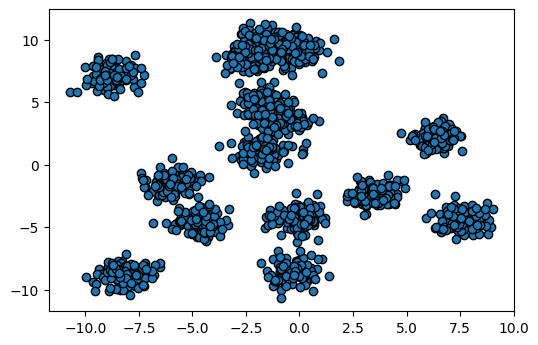

In [45]:
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 100

plt.scatter(data['f1'], data['f2'],edgecolors='black')


In [46]:
import  numpy as np

data_aux = []

for row in data.itertuples():
    aux = [row.f1, row.f2]
    data_aux.append(aux)

data = np.array(data_aux)

In [47]:
from sklearn.cluster import KMeans

distortions = []
for qtd in range(1,21):
    model = KMeans(n_clusters=qtd)
    model.fit(data)

    metrica= model.inertia_
    distortions.append(metrica)

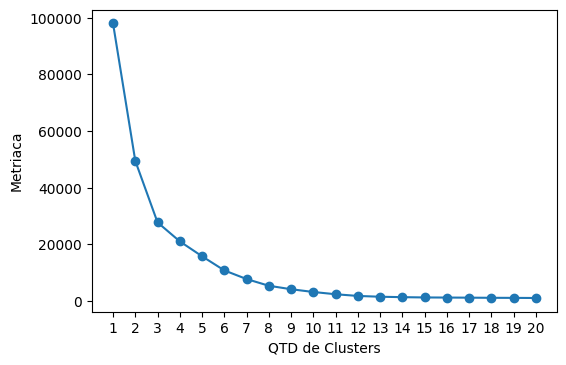

In [48]:
plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('QTD de Clusters')
plt.ylabel('Metriaca')
plt.xticks(range(1,21))

plt.show()

In [49]:
#Criando Modelo

In [50]:
model = KMeans(n_clusters=13)
model.fit(data)

KMeans(n_clusters=13)

In [51]:
resposta = model.predict(data)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

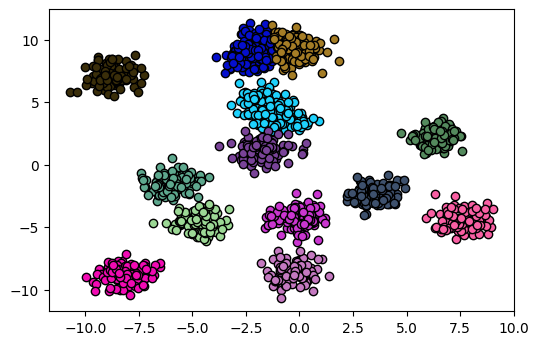

In [52]:
for i in range(13):
    grupo_i = data[resposta == i]
    plt.scatter(grupo_i[:,0], grupo_i[:,1], c=np.random.rand(3), edgecolors='Black')

In [53]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score

sh = silhouette_score(data,model.labels_)
ch = calinski_harabasz_score(data, model.labels_)

In [54]:
print(f'SH: {sh}')
print(f'CH: {ch}')

SH: 0.6345099296468563
CH: 8736.746790590443
